# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The College Board is a non-profit that connects students to college success and opportunity. As part of our work, we want to track statewide participation and recommend where money is best spent to improve SAT participation rates. It is important to address this because this affects the future of all stakeholders, notably the future of the state and country itself.

Using data of SAT and ACT scores and participation rates from each state in the United States (from 2017 to 2018), we'll seek to identify trends in the data and combine our data analysis with outside research to identify likely factors influencing participation rates and scores in various states.

The state that we would like to work on is Iowa. Iowa has one of the lowest SAT participation (2-3%) along with one of the highest SAT total score, but is also able to churn out above average ACT composite scores (21.8-21.9) despite having mid-range participation in ACT.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Read in SAT and ACT data for 2017
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Check first 10rows of either data
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
#Check first 10rows of either data
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:  
The data lists out
1. all the states that participated in each exam (SAT/ACT)
2. the participation rate of students in each state taking the exam (SAT/ACT)
3. the average scores of each test to be taken by students
4. the final score/grade for each state
5. There is also a dedicated entry in ACT that computes the national score/grade

#### 4a. Does the data look complete? 

In [5]:
#Check data of SAT 2017 for missing values
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
#Check data of ACT 2017 for missing values
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


Answer:   
Yes, the data looks complete. There is no missing entry/values (count of data is tallied).

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [7]:
#ACT Minimum values
act_2017[['English','Math','Reading','Science']].min()

English    16.3
Math       18.0
Reading    18.1
Science     2.3
dtype: float64

In [8]:
#ACT Maximum values
act_2017[['English','Math','Reading','Science']].max()

English    25.5
Math       25.3
Reading    26.0
Science    24.9
dtype: float64

In [9]:
#SAT Minimum values
sat_2017[['Evidence-Based Reading and Writing','Math']].min()

Evidence-Based Reading and Writing    482
Math                                   52
dtype: int64

In [10]:
#SAT Max values
sat_2017[['Evidence-Based Reading and Writing','Math']].max()

Evidence-Based Reading and Writing    644
Math                                  651
dtype: int64

Answer:   
1. ACT Minimum Science score is only 2.3 (far too low below rest of scores)
2. SAT Minimum Math score is only 52 (far too low below rest of scores)

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [11]:
#Set Maryland Math SAT score to '524'
sat_2017.loc[20,'Math'] = 524

**Maryland SAT Math scores is 524**

In [12]:
#Set Maryland Science ACT score to '23.2'
act_2017.loc[21,'Science'] = 23.2

**Maryland ACT Science scores is 23.2**

#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
#Display datatypes for SAT 2017
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [14]:
#Display datatypes for ACT 2017
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

1. Wrong/unexpected types
    - Participation (SAT & ACT) are using object (due to '%'), cannot be sorted 
    - Composite (ACT) is using object, should use float64
      - Composite score of Wyoming contains an x
2. National Average is not a state

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [15]:
#Function to convert participation from obj to int
def convert_pctg_int(val):
    return int(val.replace('%',''))

- Fix any individual values preventing other columns from being the appropriate type.

In [16]:
#Other columns do not have '%', if use on other columns, out 'use other function'
def convert_pctg_int(val):
    if '%' not in val:
        return 'use other function'
    else:
        return int(val.replace('%',''))

- Finish your data modifications by making sure the columns are now typed appropriately.

In [17]:
#Apply function to SAT Participation column
sat_2017['Participation'] = sat_2017['Participation'].apply(convert_pctg_int)

- Display the data types again to confirm they are correct.

In [18]:
#Check datatypes to confirm if above worked
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     int64 
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [19]:
#Apply function to ACT Participation column
act_2017['Participation'] = act_2017['Participation'].apply(convert_pctg_int)

#Check datatypes to confirm if above worked
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     int64  
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 3.0+ KB


In [20]:
#convert ACT 'Composite' to float & correcting Wyoming data (remove 'x')
act_2017['Composite'] = act_2017['Composite'].apply(lambda x: x.replace('x', '')).astype('float')

#Check datatypes to confirm if above worked
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     int64  
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
#Make all column names lowercase
#Replace all space with underscores
act_2017.columns = act_2017.columns.str.lower().str.replace(' ','_')
sat_2017.columns = sat_2017.columns.str.lower().str.replace(' ','_')

In [22]:
#Rename for ACT columns from participation onwards (do not change 'State')
#if use (.add_suffix) will add all column
for column in act_2017.columns[1:]:
    act_2017.rename(columns={column:'act_'+column+'_2017'}, inplace=True)

In [23]:
#Rename for SAT columns from participation onwards (do not change 'State')
for column in sat_2017.columns[1:]:
    sat_2017.rename(columns={column:'sat_'+column+'_2017'}, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description
|:---|:----:|:---:|:---
|State|Object|ACT|States that participate in ACT examination
|Particpation|Int|ACT|Participation rate of students in each state taking part in the exam
|English|Float|ACT|Scores of English test
|Math|Float|ACT|Scores of Math test
|Reading|Float|ACT|Scores of Reading test
|Science|Float|ACT|Scores of Science test
|Composite|Float|ACT|Composite score of each state

|Feature|Type|Dataset|Description
|:---|:----:|:---:|:---
|State|Object|SAT|States that participate in SAT examination
|Particpation|Int|SAT|Participation rate of students in each state taking part in the exam
|Evidence-based_Reading_and_Writing|Int|SAT|Scores of Evidence-based Reading and Writing test
|Math|Int|SAT|Scores of Math test
|Total|Int|SAT|Total scores of each state

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [24]:
#Drop 'National' row from ACT data
index_drop = act_2017.loc[act_2017['state'] == 'National'].index
act_2017 = act_2017.drop(index_drop)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [25]:
#Merge SAT 2017 and ACT 2017 dataset into 1 called 'data2017'
data2017 = pd.DataFrame()
data2017 = pd.merge(sat_2017,act_2017, on='state')

#Check merged dataset
data2017.head(3)

,state,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [26]:
#Save merged dataset into 'combined_2017'
data2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [27]:
#Read in SAT and ACT data for 2018
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

In [28]:
#Change 'Participation' datatype to int for SAT 2018
sat_2018['Participation'] = sat_2018['Participation'].apply(convert_pctg_int)

In [29]:
#See ACT 2018 column names to align with act_2017
act_2018.head(3)

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2


In [30]:
#Rename 'Percentage of Students Tested' to 'Participation'
act_2018.rename(columns = {'Percentage of Students Tested':'Participation'}, inplace=True)

#Take away the 'average' and 'score' out of columns in ACT 2018
for column in act_2018.columns[2:]:
    act_2018.rename(columns={column:(column.replace('Average ','').replace(' Score',''))}, inplace=True)

In [31]:
#Make all column names lowercase
#Replace all space with underscores
act_2018.columns = act_2018.columns.str.lower().str.replace(' ','_')
sat_2018.columns = sat_2018.columns.str.lower().str.replace(' ','_')

In [32]:
#Rearrange column sequence in ACT 2018 to align with act_2017
act_2018 = act_2018[["state", "participation", "english", "math", "reading", "science", "composite"]]

In [33]:
#Rename for ACT columns from participation onwards (do not change 'State'), align with above 2017 data
for column in act_2018.columns[1:]:
    act_2018.rename(columns={column:'act_'+column+'_2018'}, inplace=True)

#Rename for SAT columns from participation onwards (do not change 'State'), align with above 2017 data
for column in sat_2018.columns[1:]:
    sat_2018.rename(columns={column:'sat_'+column+'_2018'}, inplace=True)

In [34]:
#Merge 2018 data together
data2018 = pd.DataFrame()
data2018 = pd.merge(sat_2018,act_2018, on='state')

#Check merged dataframe
data2018.head()

,state,sat_participation_2018,sat_evidence-based_reading_and_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
0,Alabama,6,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,43,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,29,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,5,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [35]:
#Combine 2017 dataset and 2018 dataset together
data1718 = pd.DataFrame()
data1718 = pd.merge(data2017,data2018, on='state')

#Check merged dataset of 2017-18
data1718.head()

,state,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_evidence-based_reading_and_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,...,6,595,571,1166,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,...,43,562,544,1106,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,...,29,577,572,1149,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,...,5,592,576,1169,100,19.1,18.9,19.7,19.4,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,...,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7


In [36]:
#Save dataset to 'final.csv'
data1718.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [37]:
#Check overview of numeric feature
data1718.describe()

,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_evidence-based_reading_and_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [38]:
#Create function that manually calculates standard deviation
def calc_stddev(x):
    n = len(x)
    mean_ = sum(x) / n
    var_ = sum((item - mean_)**2 for item in x) / (n)
    std_ = var_ ** 0.5
    return std_

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [39]:
#Make data into a dictionary with values in a list
field = data1718.to_dict('list')

#Remove 'State' from dataset (do not want to get std dev for 'state')
field.pop('state')

#Using dictionary comprehension, apply manual function to calculate standard deviation
{k:calc_stddev((v)) for k,v in field.items()}

{'sat_participation_2017': 34.92907076664508,
 'sat_evidence-based_reading_and_writing_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485503,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 1.7222161451443676,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2018': 36.946619223539415,
 'sat_evidence-based_reading_and_writing_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_2018': 33.745194881997506,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543,
 'act_composite_2018': 2.0855261815801147}

In [40]:
#Print out pandas .describe() function for comparison
data1718.describe()

,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_evidence-based_reading_and_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000


In [41]:
#Print out values using numpy's .std function for comparison
{k:np.std(v) for k,v in field.items()}

{'sat_participation_2017': 34.929070766645076,
 'sat_evidence-based_reading_and_writing_2017': 45.21697020437866,
 'sat_math_2017': 46.65713364485504,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363368,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.046902931484265,
 'act_science_2017': 1.7222161451443672,
 'act_composite_2017': 2.0007860815819893,
 'sat_participation_2018': 36.946619223539415,
 'sat_evidence-based_reading_and_writing_2018': 47.03460978357609,
 'sat_math_2018': 47.301945503783536,
 'sat_total_2018': 93.22742384464432,
 'act_participation_2018': 33.745194881997506,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.0157072555557174,
 'act_reading_2018': 2.1458918845104216,
 'act_science_2018': 1.8516885484833538,
 'act_composite_2018': 2.0855261815801143}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:  
**Does not match up, pandas .describe() method is slightly higher.   
Values for manual calculation and numpy's .std() matched up instead.**


"The reason it's different is because pandas uses bottleneck (if it's installed) when calling the mean operation, as opposed to just relying on numpy. bottleneck is presumably used since it appears to be faster than numpy (at least on my machine), but at the cost of precision. They happen to match for the 64 bit version, but differ in 32 bit land (which is the interesting part)."

From:  
https://stackoverflow.com/questions/53042250/mean-from-pandas-and-numpy-differ

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [78]:
#Use .sort_values to find states with highest and lowest participation rates
#Sorting method
data1718.sort_values('sat_participation_2017', ascending=False).head(5)

,state,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018,act_ptcpt_change,compo_change,sat_ptcpt_change,total_change
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,...,32,23.7,22.7,24.4,23.0,23.6,0,-0.6,-8,27
22,Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,...,22,24.5,23.9,24.7,23.9,24.4,-7,0.3,0,6
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,...,26,26.0,24.8,26.1,24.9,25.6,-5,0.4,0,12
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,...,17,23.7,23.1,24.5,23.4,23.2,-1,-0.9,0,2
29,New Hampshire,96,532,520,1052,18,25.4,25.1,26.0,24.9,...,16,25.1,24.7,25.6,24.4,25.1,-2,-0.4,0,11


In [43]:
#Use .sort_values to find states with highest and lowest total/composite scores
data1718[['state','act_participation_2017','act_composite_2017']].sort_values('act_composite_2017', ascending=False).head()

,state,act_participation_2017,act_composite_2017
29,New Hampshire,18,25.5
21,Massachusetts,29,25.4
6,Connecticut,31,25.2
19,Maine,8,24.3
8,District of Columbia,32,24.2


Answer:

**Highest Participation**  
2017 SAT - District of Columbia, Michigan, Connecticut, Delaware  
2018 SAT - Colorado, Connecticut, Delaware, Michigan   
2017 ACT - Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, NorthCarolina, Oklahoma, SouthCarolina, Tennessee, Utah, Wisconsin, Wyoming  
2018 ACT - Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nevada, NorthCarolina, Oklahoma, SouthCarolina, Tennessee, Utah, Wisconsin, Wyoming, Ohio, Nebraska   

**Lowest Participation**  
2017 SAT - Iowa, Mississippi, NorthDakota  
2018 SAT - NorthDakota  
2017 ACT - Maine  
2018 ACT - Maine  

**Highest Mean Total/Composite**  
2017 SAT - Minnesota  
2018 SAT - Minnesota   
2017 ACT - New Hampshire  
2018 ACT - Connecticut  

**Lowest Mean Total/Composite**  
2017 SAT - District of Columbia  
2018 SAT - District of Columbia  
2017 ACT - Nevada   
2018 ACT - Nevada  

**Observations:**

1. At the moment, there are a lot of states that go for ACT (17 total states with 100% participation in 2017 & 2018!)  
   Compared to SAT, there are less than 5 with 100% participation  
   Seems that ACT is still more popular than SAT currently.  
   
   
2. States that have high participation in one test have very low mean scores in that particular test, vice versa.  
   Example: District of Columbia has 100% participation in SAT, but had the lowest SAT mean score  
   This holds the same for Nevada in ACT.

In [44]:
#Define search rule for year-on-year change (100% in 2017 and dropped in 2018) and check answer
#boolean masking method
rule = (data1718['sat_participation_2017'] == 100) & (data1718['sat_participation_2018'] != 100)
#Print ans
data1718[rule]

,state,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_evidence-based_reading_and_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,...,92,497,480,977,32,23.7,22.7,24.4,23.0,23.6


In [45]:
#Define search rule where participation of both years is >50% and check answer
rule = (data1718['sat_participation_2017'] >= 50) & (data1718['sat_participation_2018'] >= 50)
#Print ans
data1718[rule].head()

,state,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,...,sat_participation_2018,sat_evidence-based_reading_and_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,...,60,540,536,1076,27,22.5,22.5,23.0,22.1,22.7
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,...,100,535,519,1053,26,26.0,24.8,26.1,24.9,25.6
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,...,100,505,492,998,17,23.7,23.1,24.5,23.4,23.2
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,...,92,497,480,977,32,23.7,22.7,24.4,23.0,23.6
9,Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,...,56,550,549,1099,66,19.2,19.3,21.1,19.5,19.9


**States with 100% participation on a given test have a rate change year-to-year**  
Ans:   
**SAT**  
District of Columbia   
**ACT**  
Colorado, Minnesota

**States with >50% participation on both tests either year**  
Ans:   
**SAT**  
California, Connecticut, Delaware, District of Columbia, Florida, Georgia, Hawaii, Idaho, Indiana, Maine, Maryland, Massachusetts, Michigan, NewHampshire, NewJersey, NewYork, Pennsylvania, Rhode Island, SouthCarolina, Texas, Vermont, Virginia, Washington  
**ACT**  
Alabama, Arizona, Arkansas, Florida, Gerogia, Hawaii, Iowa, Kansas, Kentucky, Louisiana, Minnesota,Mississippi, Misouri, Montana, Nebraska, Nevada, NewMexico, NorthCarolina, NorthDakota, Ohio, Oklahoma, SouthCarolina, SouthDakota, Tennessee, Utah, WestVirginia, Wisconsin, Wyoming

In [105]:
#Check data of states that is more interesting
data1718[['state','sat_participation_2017','sat_participation_2018','sat_total_2017','sat_total_2018','act_composite_2017','act_composite_2018','act_participation_2017','act_participation_2018']].sort_values('sat_total_2017', ascending=False).head(5)

,state,sat_participation_2017,sat_participation_2018,sat_total_2017,sat_total_2018,act_composite_2017,act_composite_2018,act_participation_2017,act_participation_2018
23,Minnesota,3,4,1295,1298,21.5,21.3,100,99
49,Wisconsin,3,3,1291,1294,20.5,20.5,100,100
15,Iowa,2,3,1275,1265,21.9,21.8,67,68
25,Missouri,3,4,1271,1262,20.4,20.0,100,100
16,Kansas,4,4,1260,1265,21.7,21.6,73,71


State that seems interesting: Iowa

<u>Reason</u>
- has the lowest SAT participation scores (2~3%)
- the opposite test (ACT) expect to have high participation rate (close to top), but only has a midrange participation (67~68%)
- however, Iowa has above average (top 20) ACT composite scores (21.8~21.9) despite NOT having mid-range participation in ACT

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1.0, 'Correlation Heatmap of All Factors in ACT/SAT Exams')

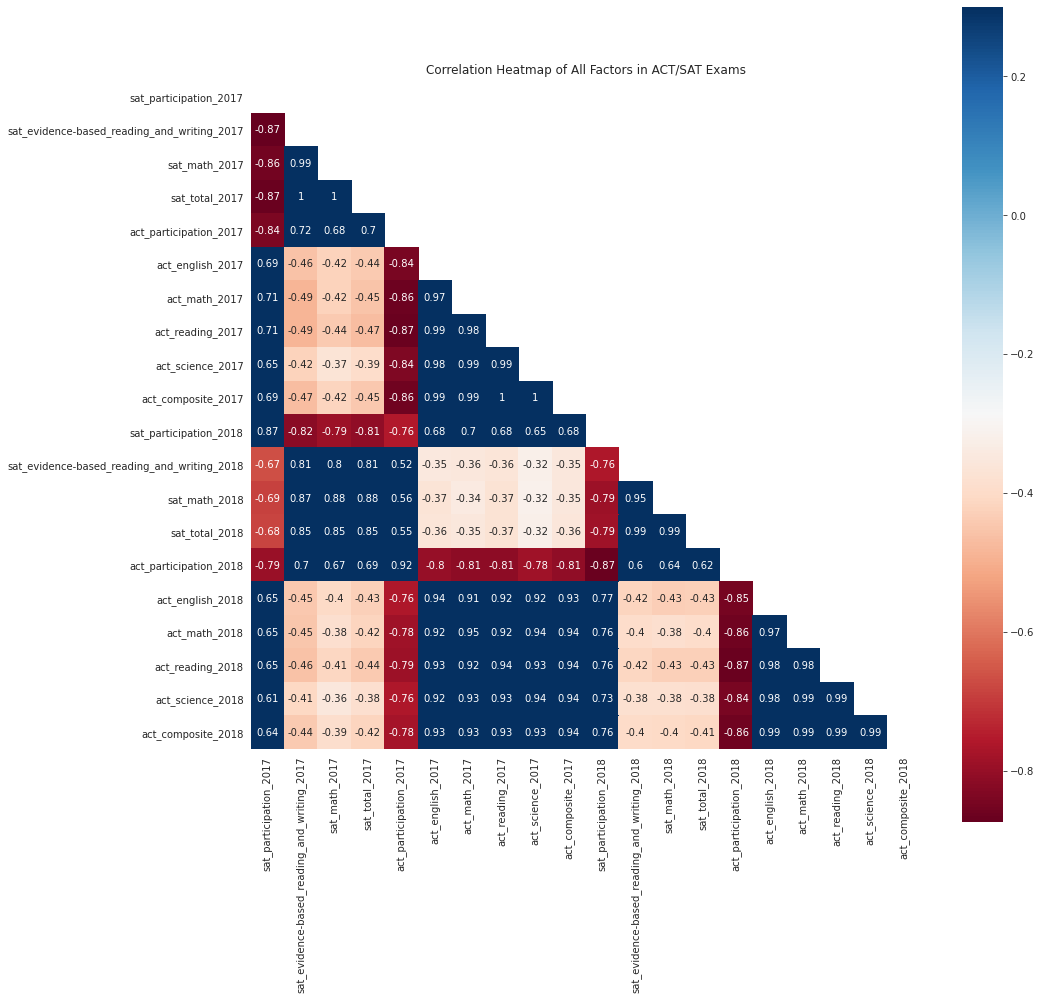

In [46]:
#Plot heatmap using Seaborn

#Establish size of figure.
plt.figure(figsize =(15,15))

#Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(data1718.corr())
mask[np.triu_indices_from(mask)] = True

#Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(data1718.corr(), mask=mask, vmax=.3, square=True, annot=True, cmap="RdBu")

#Set title    
plt.title('Correlation Heatmap of All Factors in ACT/SAT Exams')

**Observation**

1. Particpations for any given year is negatively correlated to the subject test scores of that particular test
   These can be seen in the high corr scores in the range of -0.7~-0.9
2. Inversely, subject test scores of the opposite exam (SAT<->ACT, vice versa) will be highly correlated 0.7~0.9

- Example: SAT participation is negatively correlation to SAT subject scores and highly correlated to ACT subject scores!

3. Total/Composite scores of any particular tests are also highly correlated to the individual tests.
   This is true because the former is the average of the latter.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [47]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 12)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(column)
        ax[i].set_xlabel(list_of_xlabels)
        ax[i].set_ylabel('Freq')
        # Set titles, labels, etc here for each subplot

In [48]:
#set seaborn theme for plots
sns.set()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

**Participation rates for SAT & ACT**

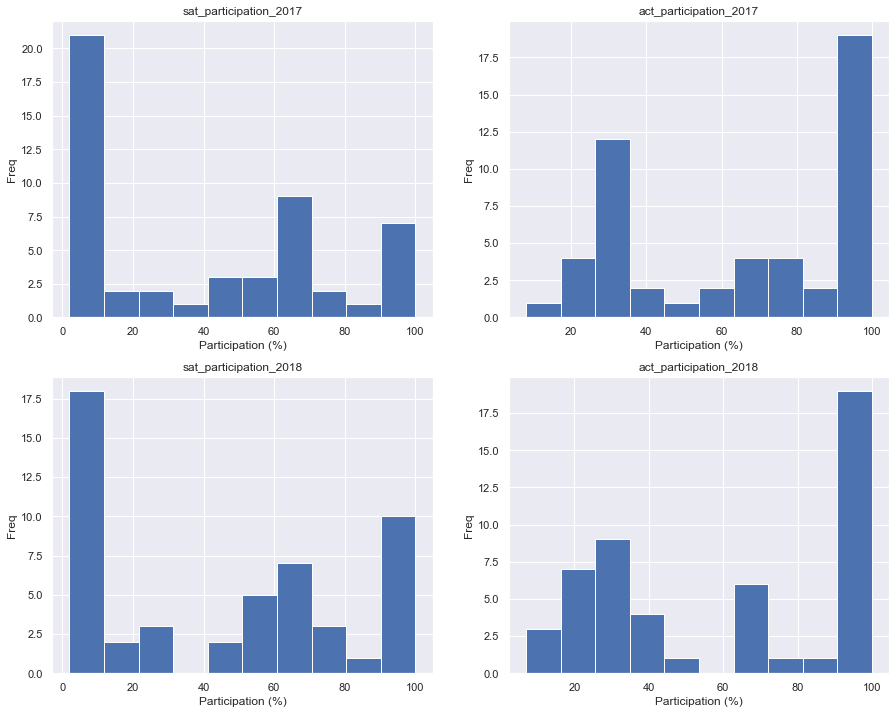

In [49]:
#Plot participation rates for SAT and ACT
#put list of data into observed data (obs_data)
obs_data = []
for i in data1718.columns:
    if 'participation' in i:
        obs_data.append(i)
subplot_histograms(data1718, obs_data, obs_data, 'Participation (%)')

**Observation**

1. Overall, there is not much shift in the participation rate between 2017 and 2018 for both tests.
2. <span style="color:blue">There are many states that have not accepted SAT yet, judging from the high peak towards the left end (0-10%)</span>
3. <span style="color:blue">These states are also likely to be supporting students to take ACT, as there is a very high peak towards the right end in ACT charts (90-100%)</span>

**Math scores for SAT & ACT**

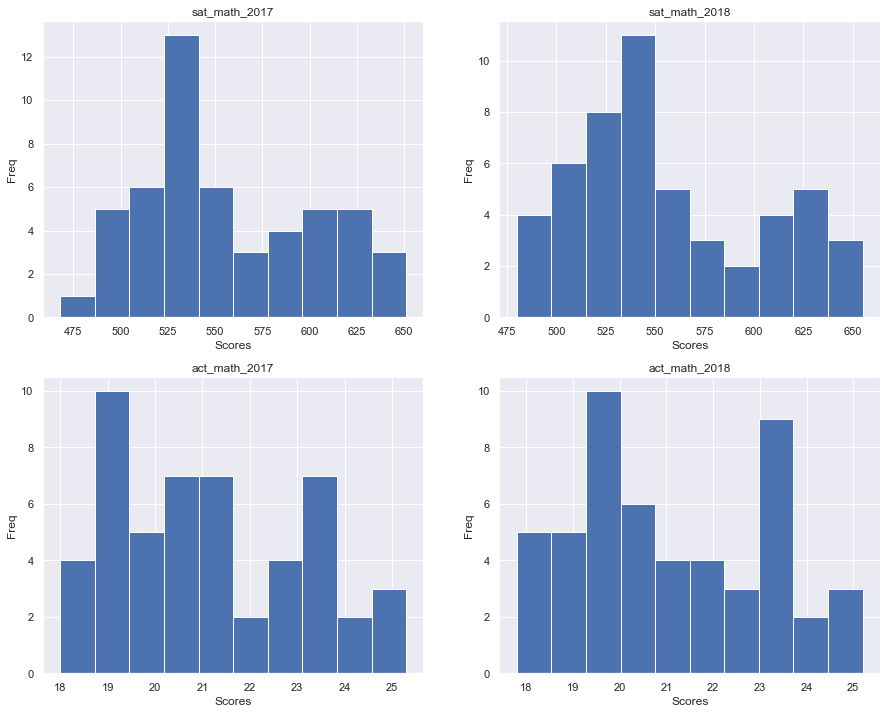

In [50]:
#Plot math scores for SAT and ACT
hist_data = ['sat_math_2017','sat_math_2018','act_math_2017','act_math_2018']
subplot_histograms(data1718, hist_data, hist_data, 'Scores')

**Observation**

1. There is an overall decrease in SAT Math scores (peak is lower and more right-skewed)
2. ACT math scores look more stable, with more states improving their average scores closer to the 75% quantile range

**Reading/verbal scores for SAT & ACT**

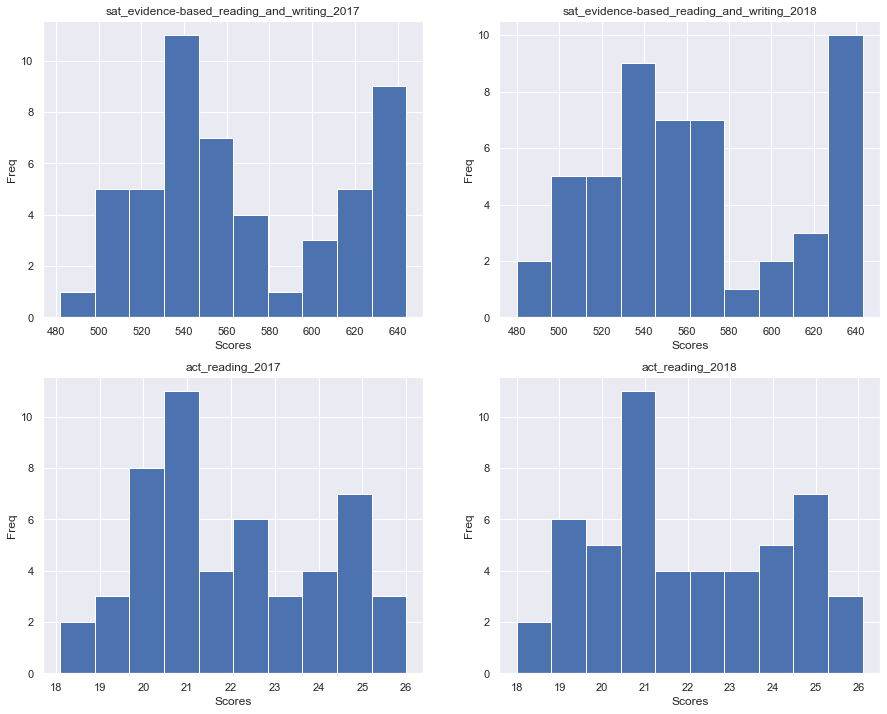

In [51]:
#Plot reading/verbal scores for SAT and ACT
hist_data = ['sat_evidence-based_reading_and_writing_2017','sat_evidence-based_reading_and_writing_2018','act_reading_2017','act_reading_2018']
subplot_histograms(data1718, hist_data, hist_data, 'Scores')

**Observation**

1. Reading/Verbal scores for both SAT and ACT did not have any much changes either

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [52]:
def plot_scatter(dataframe,list_of_columns, list_of_titles):
    # Establish the size of the figure.
    plt.figure(figsize=(12, 5))

    plt.scatter(dataframe[list_of_columns[0]],dataframe[list_of_columns[1]])

    plt.title(list_of_titles[0]+' versus '+list_of_titles[1], fontsize = 20)
    plt.ylabel(list_of_titles[1], fontsize = 16)
    plt.xlabel(list_of_titles[0], fontsize = 16)
    
    #Add a best fit line for better interpretation
    m, b = np.polyfit(dataframe[list_of_columns[0]], dataframe[list_of_columns[1]], 1)
    x = dataframe[list_of_columns[0]]
    #m = slope, b=intercept
    plt.plot(x, m*x + b);

**Math scores for SAT & ACT**

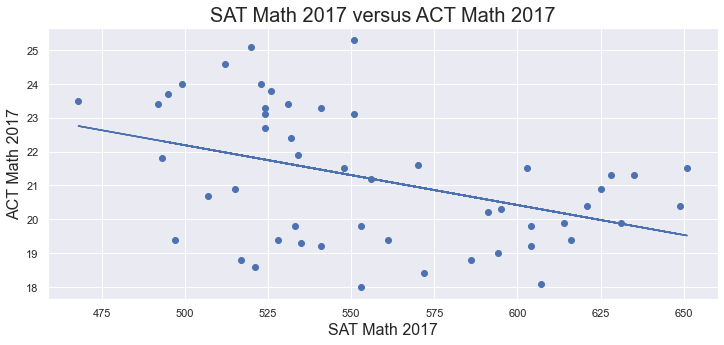

In [53]:
#Define data into scat_data and axis title
#Plot Math scores SAT & ACT
scat_data = ['sat_math_2017','act_math_2017']
title = ['SAT Math 2017','ACT Math 2017']
plot_scatter(data1718, scat_data, title)

**SAT vs. ACT verbal/reading scores for 2017**

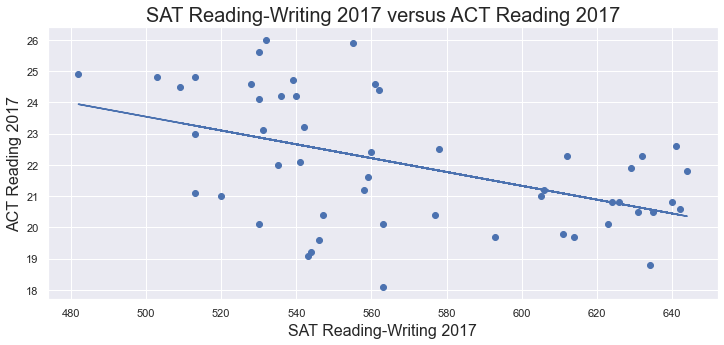

In [54]:
#Plot verbal/reading scores SAT & ACT
scat_data = ['sat_evidence-based_reading_and_writing_2017','act_reading_2017']
title = ['SAT Reading-Writing 2017','ACT Reading 2017']
plot_scatter(data1718, scat_data, title)

**SAT vs. ACT total/composite scores for 2017**

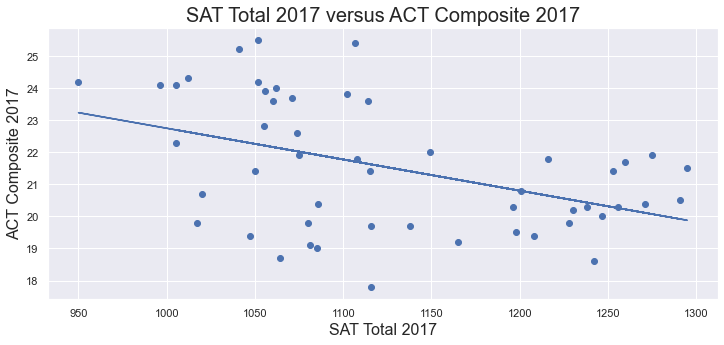

In [55]:
#Plot total/composite scores SAT & ACT
scat_data = ['sat_total_2017','act_composite_2017']
title = ['SAT Total 2017','ACT Composite 2017']
plot_scatter(data1718, scat_data, title)

**Observation**

1. <span style="color:blue">For above 3 plots, we can see that generally, ACT scores and SAT scores are inversely correlated.<span>
2. For example, if a state does good in SAT, it is highly likely that it's score in ACT is going to be pretty low.
3. **This relationship was also observed in the heatmap!**

**Total scores for SAT 2017 vs. 2018**

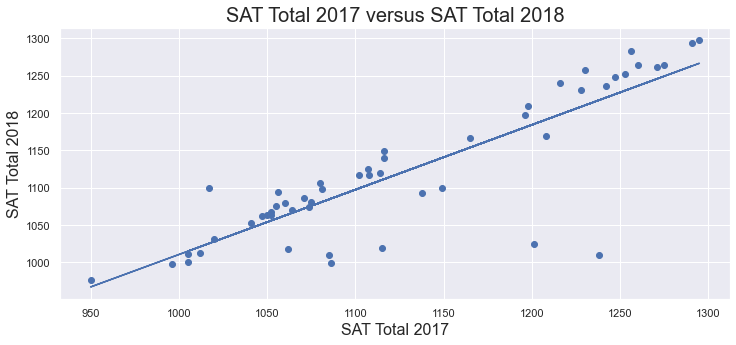

In [56]:
#Plot total scores for SAT 17 vs 18
scat_data = ['sat_total_2017','sat_total_2018']
title = ['SAT Total 2017','SAT Total 2018']
plot_scatter(data1718, scat_data, title)

**Composite scores for ACT 2017 vs. 2018**

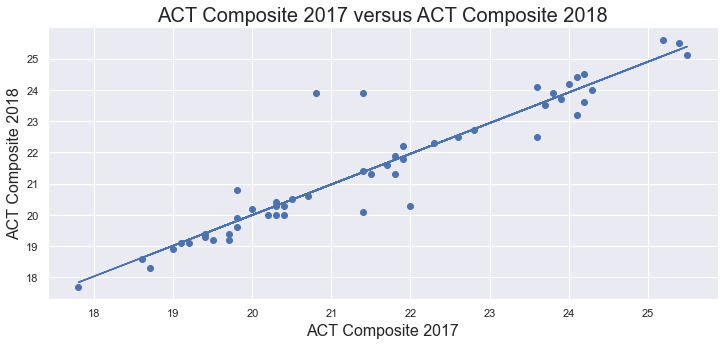

In [57]:
#Plot composite scores for ACT 17 vs 18
scat_data = ['act_composite_2017','act_composite_2018']
title = ['ACT Composite 2017','ACT Composite 2018']
plot_scatter(data1718, scat_data, title)

**Observation**

1. <span style="color:blue">For SAT, we can see that overall, there are more states, especially the high performing ones, that fared better in subsequent year 2018 (above the line). There are 2 outliers where scores dropped drastically, but are due to other influence (to be discussed below)<span>
2. For ACT, scores are stable. 2 states that did much better were the states linked to SAT in point 1.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [60]:
#Put list of data into observed data (obs_data) - add participation for ACT and SAT
obs_data = []
for i in data1718.columns:
    if ('act' in i or 'sat' in i) and 'participation' in i:
        obs_data.append(i)

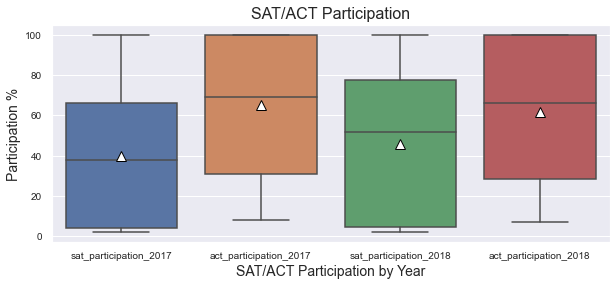

In [61]:
#Plot boxplot for participations
plt.figure(figsize=(10, 4))
sns.boxplot(data = data1718[obs_data], width=0.8, showmeans=True, 
            meanprops={"markerfacecolor":"white","markeredgecolor":"black","markersize":"10"});
plt.title("SAT/ACT Participation", fontsize=16)
plt.xlabel("SAT/ACT Participation by Year", fontsize=14)
plt.ylabel("Participation %", fontsize=14)
plt.tick_params(labelsize=10)

**Observation**

1. SAT participation had increased, while ACT participation dropped
1. <span style="color:blue">More people are choosing to take SATs, this can be contributed to the rising popularity of SAT exam (further discussed below)<span>

In [62]:
#Put list of data into observed data (obs_data) - add ACT subjects
obs_data = []
for i in data1718.columns:
    if 'act' in i and 'participation' not in i:
        obs_data.append(i)

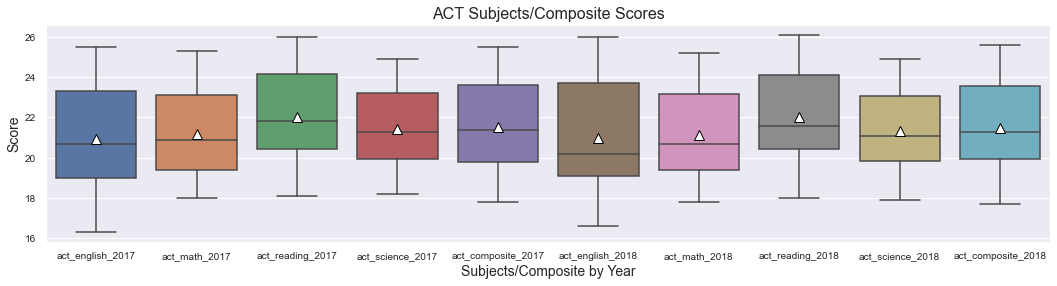

In [63]:
#Plot boxplot for ACT Subjects
plt.figure(figsize=(18, 4))
sns.boxplot(data = data1718[obs_data], width=0.8, showmeans=True, 
            meanprops={"markerfacecolor":"white","markeredgecolor":"black","markersize":"10"});
plt.title("ACT Subjects/Composite Scores", fontsize=16)
plt.xlabel("Subjects/Composite by Year", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.tick_params(labelsize=10)

In [64]:
#Put list of data into observed data (obs_data) - add SAT subjects
obs_data = []
for i in data1718.columns:
    if 'sat' in i and 'total' not in i and 'part' not in i:
        obs_data.append(i)

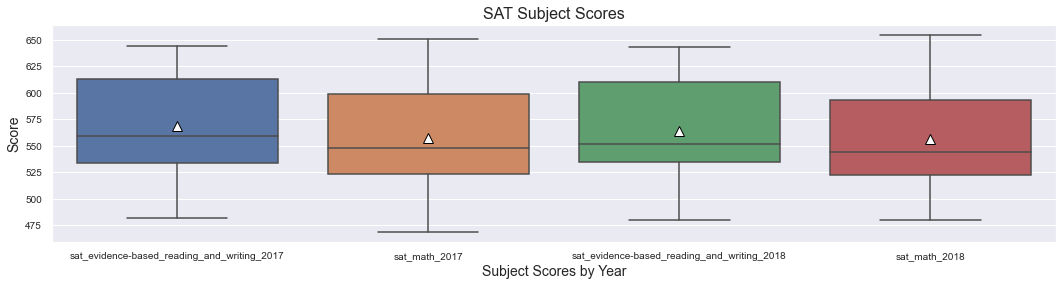

In [65]:
#Plot boxplot for SAT subject scores
plt.figure(figsize=(18, 4))
sns.boxplot(data = data1718[obs_data], width=0.8, showmeans=True, 
            meanprops={"markerfacecolor":"white","markeredgecolor":"black","markersize":"10"});
plt.title("SAT Subject Scores", fontsize=16)
plt.xlabel("Subject Scores by Year", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.tick_params(labelsize=10)

In [66]:
#Put list of data into observed data (obs_data) - add SAT scores
obs_data = []
for i in data1718.columns:
    if 'sat' in i and 'total' in i:
        obs_data.append(i)

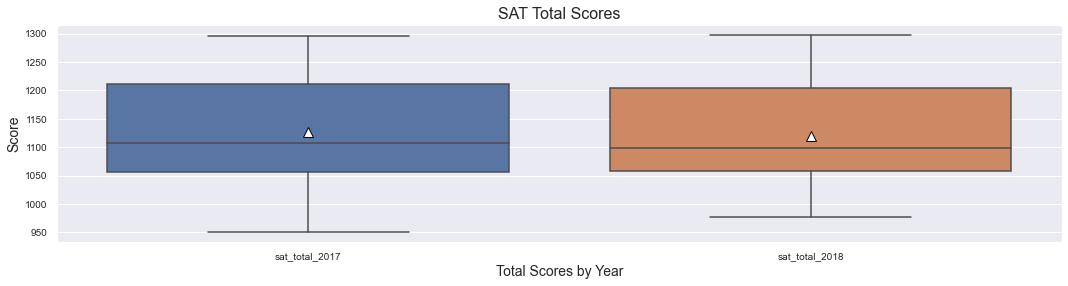

In [67]:
#Plot boxplot for SAT total scores
plt.figure(figsize=(18, 4))
sns.boxplot(data = data1718[obs_data], width=0.8, showmeans=True, 
            meanprops={"markerfacecolor":"white","markeredgecolor":"black","markersize":"10"});
plt.title("SAT Total Scores", fontsize=16)
plt.xlabel("Total Scores by Year", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.tick_params(labelsize=10)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

![part](../data/participation.JPG)

**Choropleth of ACT/SAT Participation Rate across US**  
Hawaii and Alaska excluded  
(Blue - SAT / Red - ACT)  
<u> the deeper the colour, the higher the participation rate </u>

- **Most of the midlands states are more likely to take the ACT test**
- **States closer to the coasts are more likely to prefer taking SAT test**

![2016 US Election Result](https://static01.nyt.com/newsgraphics/2016/12/08/year-in-graphics/assets/election-results.jpg)

**Source: https://www.nytimes.com/elections/2016/results/president**

Above map is the 2016 US election result map from NYTimes. Democrats in blue and Republicans in red.  
From a glance (comparing maps in ACT/SAT participation and above, there is a possibility that  
- **Republican states are more biased towards ACT**
- **Democratic states are more biased towards SAT**

<u>However, this needs further discussion and is only a viewpoint assumption</u>

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [110]:
#Show descriptive measures (exm, mean, std) with .describe()
data1718.describe()

,sat_participation_2017,sat_evidence-based_reading_and_writing_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_english_2017,act_math_2017,act_reading_2017,act_science_2017,act_composite_2017,sat_participation_2018,sat_evidence-based_reading_and_writing_2018,sat_math_2018,sat_total_2018,act_participation_2018,act_english_2018,act_math_2018,act_reading_2018,act_science_2018,act_composite_2018,act_ptcpt_change,compo_change,sat_ptcpt_change,total_change
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275,-3.607843,-0.033333,5.941176,-6.078431
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278,13.447793,0.724063,18.271740,50.674587
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000,-70.000000,-1.700000,-27.000000,-228.000000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000,-4.000000,-0.300000,0.000000,-2.500000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000,-1.000000,-0.100000,1.000000,6.000000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000,0.000000,0.100000,5.000000,16.500000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000,25.000000,3.100000,90.000000,82.000000


In [109]:
#Calculate skewness
skewValue = data1718.skew()
skewValue

sat_participation_2017                         0.346450
sat_evidence-based_reading_and_writing_2017    0.272693
sat_math_2017                                  0.365040
sat_total_2017                                 0.310903
act_participation_2017                        -0.197989
act_english_2017                               0.352660
act_math_2017                                  0.332683
act_reading_2017                               0.269366
act_science_2017                               0.218823
act_composite_2017                             0.319810
sat_participation_2018                         0.136228
sat_evidence-based_reading_and_writing_2018    0.282300
sat_math_2018                                  0.530407
sat_total_2018                                 0.466432
act_participation_2018                        -0.021916
act_english_2018                               0.371507
act_math_2018                                  0.269548
act_reading_2018                               0

Participation - overall spread of the participation rate of either tests are very wide (high standard deviation). This shows that overall in the US, acceptance of both tests are mixed.

SAT/ACT Subject scores - overall the spread of the scores is quite tight. Scores for either tests for all states are not too dispersed (coefficient of variation less than 1)

Skewness - Based on the skewness from Pandas, we can say that **none of the features are normally distributed (skew=0)**. The closest does seem to be for participation rate of ACT in 2018 (skew= -0.02) but we already know that many states have close to full participation, so this is not valid. Quick view also shows that most of the features are skewed to the right (positive).

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: **NO**

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

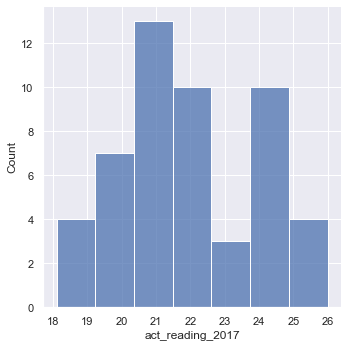

In [69]:
sns.displot(data1718['act_reading_2017'])

Answer:  
The assumption **does not** hold for (Math/Reading/Rate) or others   
The scores/rates are not 'normally distributed.  
Based on Central Limit Theorem, if the samples are large enough, then the **mean** will be normally distributed.   
The data does not hold this 'assumption'

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: **No**, conducting statistical inference will not help.

1. We are not extracting sampling data from the population to infer any properties or unobserved parameters
2. Because this data is highly standardized or collected, we can say that the data covers the entire population (or students)
3. Statistical inference is making decisions based on random sampling, thus, with a population, it is not helpful.  
   We can directly parametrize the relationship between SAT and ACT participation rate in a population (wider) context.

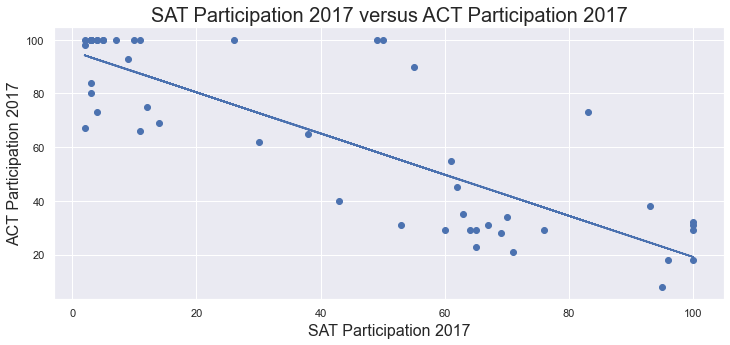

In [70]:
#Redo participation plot --> shows the relationship between SAT participation w.r.t. ACT participation
participation = ['sat_participation_2017','act_participation_2017']
title = ['SAT Participation 2017','ACT Participation 2017']
plot_scatter(data1718, participation, title)

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: It would depend on the relationship/hypothesis/inference/condition that we look at.  
We can look at the direct proportionality between the two datasets, but would be unable to make any other description without factoring in our aspects such as participation rate, etc.  
Also, the actual tests also varies in terms of scoring (scale), types of questions, format of questions, etc.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [71]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

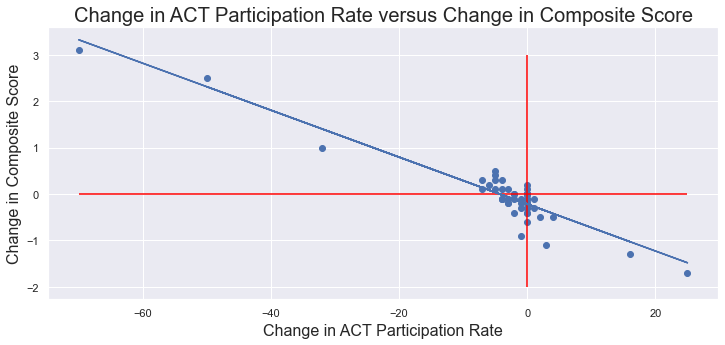

In [72]:
#TO OBSERVE THE RELATIONSHIP BETWEEN CHANGE IN PARTICIPATION RATE VS CHANGE IN COMPOSITE SCORE FOR ACT
#Create new data
new_data = data1718
new_data['act_ptcpt_change'] = new_data['act_participation_2018'] - new_data['act_participation_2017']
new_data['compo_change'] = new_data['act_composite_2018'] - new_data['act_composite_2017']
#Plot new chart to see HOW CHANGE IN PARTICIPATION AFFECT CHANGE IN COMPOSITE SCORE
sample2 = ['act_ptcpt_change','compo_change']
sample3 = ['Change in ACT Participation Rate','Change in Composite Score']
#add line where X=0 and Y=0 (NO CHANGE OBSERVED FOR SPECIFIC AXIS)
plot_scatter(new_data, sample2, sample3)
plt.vlines(x=0, ymin=-2,ymax=3,colors='red')
plt.hlines(y=0, xmin=-70,xmax=25,colors='red')

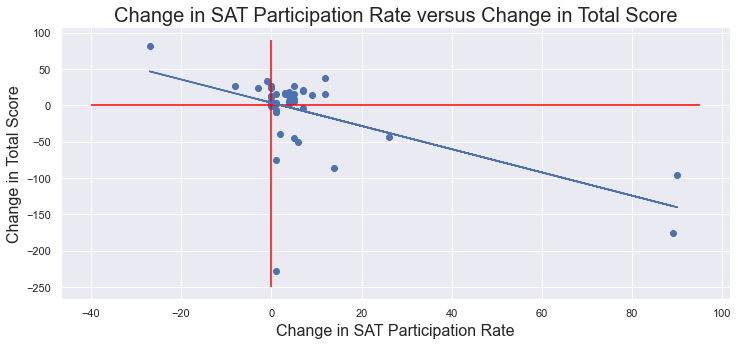

In [73]:
#TO OBSERVE THE RELATIONSHIP BETWEEN CHANGE IN PARTICIPATION RATE VS CHANGE IN TOTAL SCORE FOR SAT
#Create new data
new_data = data1718
new_data['sat_ptcpt_change'] = new_data['sat_participation_2018'] - new_data['sat_participation_2017']
new_data['total_change'] = new_data['sat_total_2018'] - new_data['sat_total_2017']
#Plot new chart to see HOW CHANGE IN PARTICIPATION AFFECT CHANGE IN COMPOSITE SCORE
sample2 = ['sat_ptcpt_change','total_change']
sample3 = ['Change in SAT Participation Rate','Change in Total Score']
#add line where X=0 and Y=0 (NO CHANGE OBSERVED FOR SPECIFIC AXIS)
plot_scatter(new_data, sample2, sample3)
plt.vlines(x=0, ymin=-250,ymax=90,colors='red')
plt.hlines(y=0, xmin=-40,xmax=95,colors='red')

In [74]:
new_data[['state','act_ptcpt_change','sat_ptcpt_change','compo_change','total_change']].head()

,state,act_ptcpt_change,sat_ptcpt_change,compo_change,total_change
0,Alabama,0,1,-0.1,1
1,Alaska,-32,5,1.0,26
2,Arizona,4,-1,-0.5,33
3,Arkansas,0,2,0.0,-39
4,California,-4,7,-0.1,21


<u>**STATES WITH INTERESTING TREND**</u>  
<u>**Colorado**</u>     
- Saw a 70% drop in ACT participation and 89% increase in SAT participaton
  - 100% SAT participation
- Due to state policy change, all students will take SATs instead<sup>1</sup>
- <span style="color:blue">State Department of Education (DOE) will cover the costs of SAT tests<sup>1</sup></span>
- However, not all is smooth.  
  More than 100 school district superintendents complained the state was switching tests midway of the 2015-16 academic year,  
  leaving juniors unprepared for the new SAT<sup>2</sup>
  - <span style="color:red">Data shows that SAT total score dropped by 176 points!</span> 
  - Same as our observation above, that the <u>**increase in participation rate is inversely proportional to the change in score**</u>

<u>**Illinois**</u>
- Saw a 50% drop in ACT participation and 90% increase in SAT participaton
  - Almost reaching 100% SAT participation too at 99% percentage
- Similar to Colorado, new law means all students will take SATs instead<sup>3</sup>
- <span style="color:blue">Tests costs are also covered by the state (Free)<sup>4</sup></span>
- <span style="color:red">As per above 'rule', total scores for 2018 also saw a drop by 96 points</span> 

<u>**Ohio**</u>
-  Saw a 25% increase in ACT participaton to:
  - 100% ACT participation
- Different from above 2 states where they prefer SATs
- <span style="color:blue">Same as above, the state paid for all students ACT exam<sup>5</sup></span>
- <span style="color:red">Predictably, composite scores also dropped -1.7 year-on-year</span> 

**Reference/Source**  
[1] https://co.chalkbeat.org/2020/7/13/21323566/colorado-offers-free-sat-dates-for-the-fall  
[2] https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/  
[3] https://chicago.chalkbeat.org/2018/7/27/21105418/illinois-has-embraced-the-sat-and-the-act-is-mad-about-it  
[4] https://www.testive.com/illinois/  
[5] https://www.daytondailynews.com/news/historically-low-act-scores-red-flag-for-our-country/djfx9Urp719WyEaMfykyxL/

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

<u>Key findings from summarizing our observations:</u>
1. At the moment, more states do prefer to take ACT, but we can see that popularity with SAT rised year-on-year
2. Participation rate in one test is negatively correlated to the participation in the other test.
   SAT and ACT participations are mirror of each other.
2. Participation rate is negatively correlated to the change in score, vice-versa
3. Participation rate in one test is positively correlated to the change in score in the other test.  

Most states that have high participations in either tests are likely to have policies that mandate the participation in the test<sup>5</sup>. Students that are not college-bound will also take part, thus pulling down the average scores.
On the other hand, if participations are low, then this situation is likely due to students taking initative to undertake the exam in hopes of getting a high score and admission into college.

Another potential viewpoint that was observed is that Republican states are more biased towards ACT while Democratic states are more biased towards SAT. However, this needs to be further investigated. Further data would be required to check this relationship, such as percentage of democrat/republic demographic.

<u>Why Iowa?</u>
1. Iowa has one of the lowest SAT participation rate 
2. ACT composite scores are in top20 even with participation rate at approx 68%
   - we know that higher participation rate should have lower score, shows that Iowa bucked the trend
2. Iowa has a 91.4% high school graduation rate, best in the country<sup>6</sup>
3. Iowa has one of the lowest graduation requirement standards at the state level<sup>6</sup>

With a high base of students graduating out of high school, there is a bigger market to promote SAT to potential college-bound students. Subsequently we can also take up more market share from ACT.
Also, Iowa has one of the lowest graduation requirements, in that they do not require students to undertake ACT/SAT to graduate<sup>6</sup>. Hence, these students who take either tests are intending to go to college. 
This coupled with the Iowa's performance in the ACT tests, we can conjecture that these students are likely to be more studious and serious with the exam.
**Thus, it is aligned the College Board's mission to set these students up for college success and bring benefit to all stakeholders involved** (themselves, their family, the state and the country).

<u>Recommendations</u>
1. The College Board (CB) can contact the state of Iowa to sign a contract, such as Colorado or Illinois.  
   This strong push has also help SAT expand its market share<sup>7</sup>.  
   If the state of Iowa makes the SAT free for students who intends to go to college, then a proportion of students might not take ACT instead.  
2. The high composite score of Iowa in the ACT can also be attributed to good teaching of covered topics in schools<sup>8</sup>. The CB should get better coaches to help train teachers in state schools. When the confidence level of the students or parents improve, then theoretically more students will partake in SAT.
3. Prepare test prep materials for students. Students in Iowa are currently ill-equipped for SAT, if this condition can be covered, then confidence level should rise as well.
4. Organize more career fairs in high schools to pique the students interest into taking college degrees. When students are more aware of possible career opportunities, then they might decide to enrol for college too.

**Reference/Source**  
[5] https://www.testive.com/state-sat-act/  
[6] https://qconline.com/news/local/education/these-4-numbers-tell-the-story-of-public-education-in-iowa/collection_3e9751ea-8939-5dde-b95b-653f96c7ab47.html#1  
[7] https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/  
[8] https://qctimes.com/news/local/education/the-numbers-iowa-s-average-act-score-is-21-6/article_5a62d78c-6744-5979-8de4-56b3d77bd1f0.html  